In [1]:
from rdkit.Chem import Draw
from rdkit import Chem

In [2]:
import os
os.chdir('../programming_scripts/.')
print(os.getcwd())

from MS2LDA_core import run_lda
from MS2LDA_core import predict_with_lda

#from Spec2Vec_annotation import motif_annotation

from MS2LDA_core import load_mgf
from MS2LDA_core import clean_spectra

from utils import motifs2spectra
from spec2vec import Spec2Vec

import heapq

C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\programming_scripts


In [3]:
spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-COLLECTIONS-PESTICIDES-POSITIVE.mgf"
# spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-NIH-SMALLMOLECULEPHARMACOLOGICALLYACTIVE.mgf"
# spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-SCIEX-LIBRARY.mgf"
# spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\MEDUSA\notebooks\MS2LDA\PDE5_standards_annotated_pos_unique.mgf"

In [4]:
lda_model, corpus, id2word = run_lda(spectra_path=spectra_path, num_motifs=54, iterations=300)

In [5]:
motif_spectra = motifs2spectra(lda_model)

[ 70.04  86.06 125.02 127.02 136.04 145.05 145.07 146.06 312.04 320.15
 326.08 334.17 895.48]
TOP 3 frags:  [(70.04, 1.0), (125.02, 0.5099680690398873), (334.17, 0.4164801264710474)]
TOP 3 losses:  [(70.04, 0.14086963558679588), (125.02, 0.11714489742329405), (334.17, 0.1162580747000455)]


(<Figure size 1600x1200 with 1 Axes>,
 <Axes: title={'center': 'Spectrum'}, xlabel='m/z', ylabel='Intensity'>)

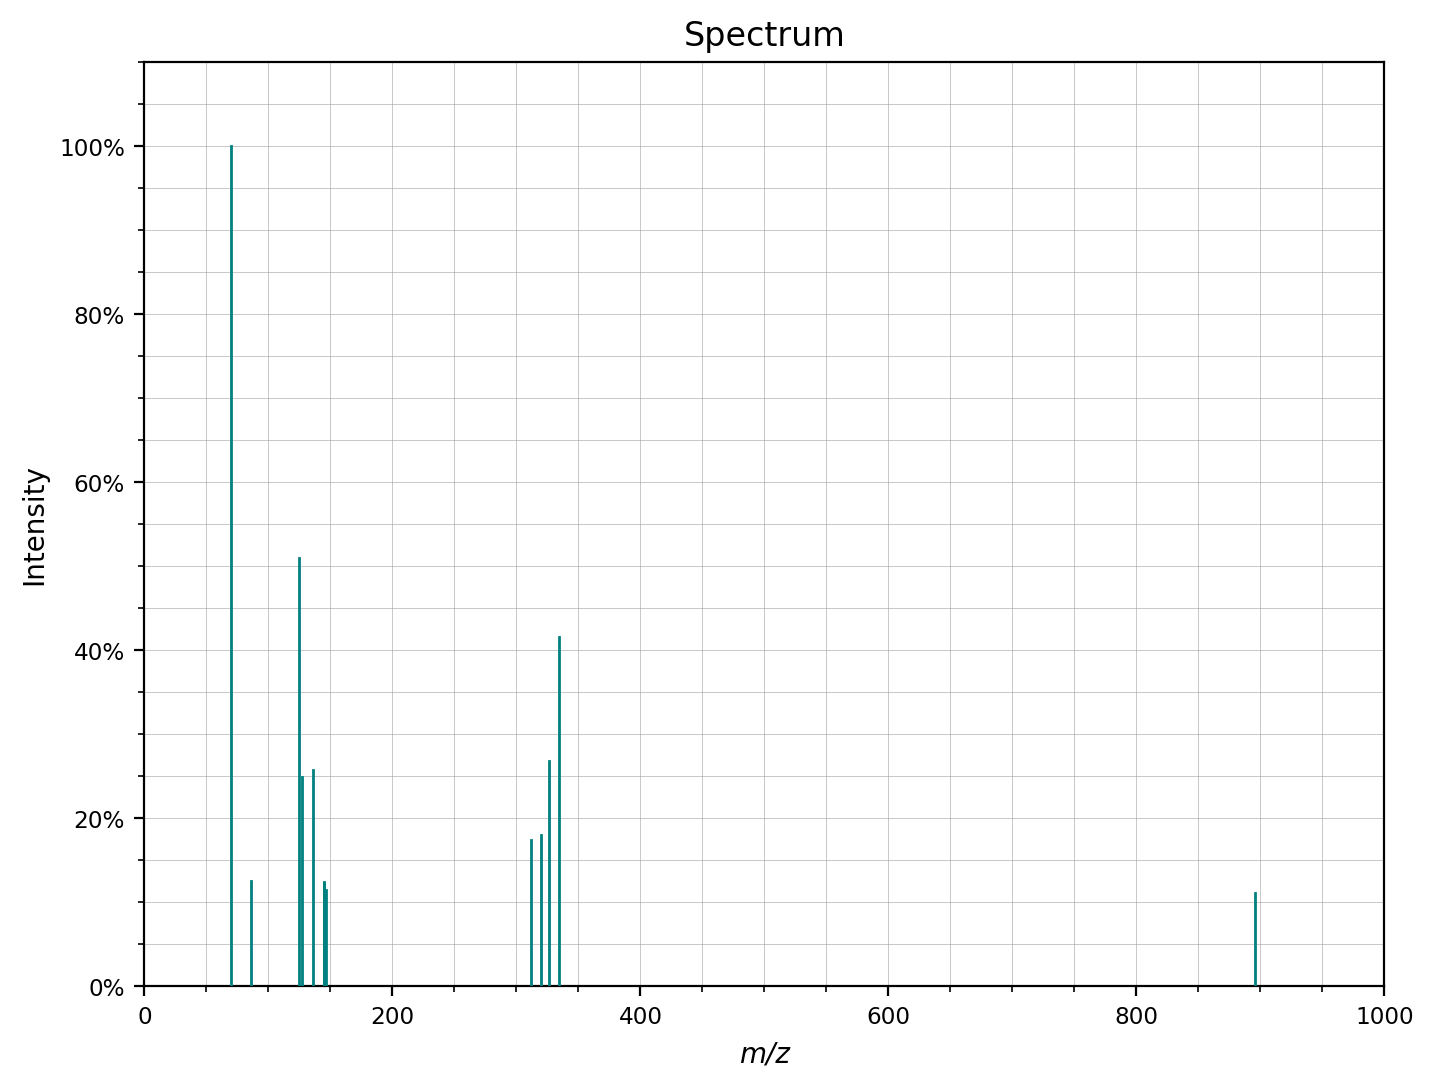

In [6]:
i = 23
print(motif_spectra[i].peaks.mz)
print("TOP 3 frags: ", heapq.nlargest(3, list(zip(motif_spectra[i].peaks.mz, motif_spectra[i].peaks.intensities)), key = lambda x: x[1]))
print("TOP 3 losses: ", heapq.nlargest(3, list(zip(motif_spectra[i].losses.mz, motif_spectra[i].losses.intensities)), key = lambda x: x[1]))
motif_spectra[i].plot()

### how to load the embeddings and then still retrieve the smiles afterwards

In [7]:
import pandas as pd

In [8]:
from Spec2Vec_annotation import load_model_and_data
from Spec2Vec_annotation import calc_similarity
from Spec2Vec_annotation import retrieve_top_hits

In [9]:
s2v_model, embeddings_smiles_DB = load_model_and_data()

In [10]:
smiles = embeddings_smiles_DB.smiles.to_numpy()
embeddings_DB = embeddings_smiles_DB.embeddings.to_list()
spectra = embeddings_smiles_DB.spectra.to_list()

In [11]:
s2v_scores = calc_similarity(s2v_model, motif_spectra, embeddings_DB)

In [12]:
top_scores, top_smiles, top_spectra = retrieve_top_hits(s2v_scores, 23, smiles, spectra)

In [13]:
top_scores

(0.5773035340672309,
 0.5620364667892666,
 0.5544394476876221,
 0.5433356193849874,
 0.5390377406356135,
 0.5239076486471104,
 0.5068356719646259,
 0.5015759870981392,
 0.49478131332857844,
 0.4934839463593273)

In [14]:
top_smiles

['ClC1=CC=C(CCC(CN2C=NC=N2)(C#N)C2=CC=CC=C2)C=C1',
 'C1=CC=C(C=C1)C(CCC2=CC=C(C=C2)Cl)(CN3C=NC=N3)C#N',
 'C1=CC=C(C=C1)C(CCC2=CC=C(C=C2)Cl)(CN3C=NC=N3)C#N',
 'CC(C)C1CCC(C1(CN2C=NC=N2)O)CC3=CC=C(C=C3)Cl',
 'ClC1=CC=C(CCC(CN2C=NC=N2)(C#N)C2=CC=CC=C2)C=C1',
 'CC(C)(C)C(CCc1ccc(cc1)Cl)(Cn2cncn2)O',
 'ClC1=CC=C(CCC(CN2C=NC=N2)(C#N)C2=CC=CC=C2)C=C1',
 'CC(C)(C)[C@H]([C@@H](CC1=CC=C(C=C1)Cl)N2C=NC=N2)O',
 'CC(C)(C)C(C(CC1=CC=C(C=C1)Cl)N2C=NC=N2)O',
 'CC(C)(C)[C@H]([C@@H](CC1=CC=C(C=C1)Cl)N2C=NC=N2)O']

[ 70.04  83.05  91.05 104.05 125.02 129.07 139.03 151.03 156.08 163.03
 190.04 194.05 216.09 241.08 251.06 268.09 337.12]
TOP 3 frags:  [(70.04, 1.0), (125.02, 0.47049874013903376), (337.12, 0.1452040810543012)]
TOP 3 losses:  [(267.08, 1.0), (212.11, 0.47049874013903376), (143.07, 0.053757421066491416)]


(<Figure size 1600x1200 with 1 Axes>,
 <Axes: title={'center': '4-(4-chlorophenyl)-2-phenyl-2-(1,2,4-triazol-1-ylmethyl)butanenitrile'}, xlabel='m/z', ylabel='Intensity'>)

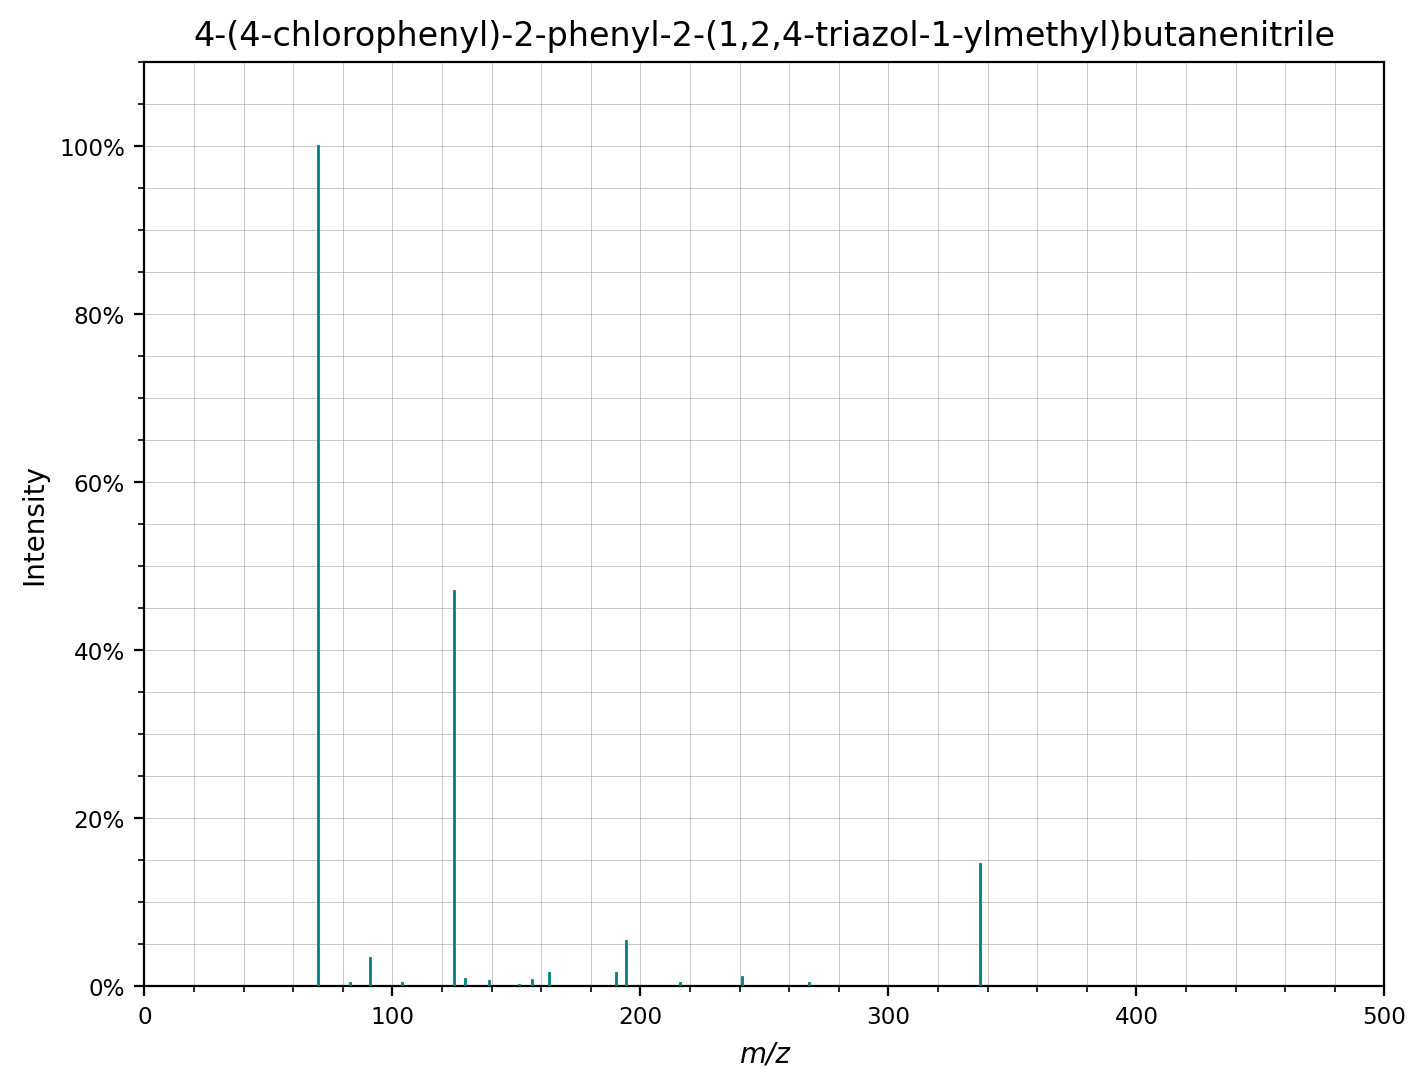

In [50]:
print(top_spectra[0].peaks.mz)
print("TOP 3 frags: ", heapq.nlargest(3, list(zip(top_spectra[0].peaks.mz, top_spectra[0].peaks.intensities)), key = lambda x: x[1]))
print("TOP 3 losses: ", heapq.nlargest(3, list(zip(top_spectra[0].losses.mz, top_spectra[0].losses.intensities)), key = lambda x: x[1]))
top_spectra[0].plot()

### What do all the spectra have in common but is not part of the motif? if there is something add it to the motif!!

---

### New Part: Retrieve overlaping fragments between spectra with motif spectra

In [16]:
from utils import match_frags_and_losses

In [17]:
# just to get some spectra: it is really important that the spectra are binned
smiles_per_motifs, predicted_motifs, predicted_motifs_distribution, spectra_per_motifs = predict_with_lda(lda_model, spectra_path, id2word)

In [18]:
i = 23

In [51]:
# matching_frags, matching_losses = match_frags_and_losses(motif_spectra[i], spectra_per_motifs[i])
matching_frags, matching_losses = match_frags_and_losses(top_spectra[0], top_spectra)

In [64]:
result = matching_frags[0].intersection(matching_frags[1])

In [58]:
result

{70.04,
 83.05,
 91.05,
 104.05,
 125.02,
 129.07,
 139.03,
 151.03,
 156.08,
 163.03,
 190.04,
 194.05,
 216.09,
 241.08,
 251.06,
 268.09,
 337.12}

In [52]:
matching_frags

[{70.04,
  83.05,
  91.05,
  104.05,
  125.02,
  129.07,
  139.03,
  151.03,
  156.08,
  163.03,
  190.04,
  194.05,
  216.09,
  241.08,
  251.06,
  268.09,
  337.12},
 {70.04,
  83.05,
  91.05,
  104.05,
  125.02,
  129.07,
  139.03,
  151.03,
  156.08,
  163.03,
  190.04,
  194.05,
  216.09,
  241.08,
  268.09,
  337.12},
 {70.04,
  83.05,
  91.05,
  104.05,
  125.02,
  129.07,
  139.03,
  151.03,
  156.08,
  163.03,
  190.04,
  194.05,
  216.09,
  241.08,
  268.09,
  337.12},
 {70.04, 83.05, 91.05, 125.02, 129.07, 139.03, 151.03, 163.03},
 {70.04,
  83.05,
  91.05,
  104.05,
  125.02,
  129.07,
  139.03,
  151.03,
  156.08,
  163.03,
  190.04,
  194.05,
  216.09,
  251.06,
  268.09,
  337.12},
 {70.04, 125.02},
 {70.04,
  83.05,
  91.05,
  104.05,
  125.02,
  129.07,
  139.03,
  151.03,
  156.08,
  163.03,
  190.04,
  216.09},
 {70.04, 125.02, 139.03, 151.03},
 {70.04, 125.02, 139.03, 151.03},
 {70.04, 125.02, 129.07, 139.03, 151.03}]

In [21]:
matching_losses

[set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set()]

### New Part: Use MassQL to search for matches

In [22]:
from MassQL_annotation import initialize_massql_DB
from MassQL_annotation import add_column
from MassQL_annotation import search_massql_DB

import pandas as pd

In [23]:
spectra_path_GNPS = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\raw_data\GNPS\cleaned_spectra_min_5_peaks.mgf"

In [24]:
## initialize new DB

#ms1_df, ms2_df = initialize_massql_DB(spectra_path_GNPS)
#ms1_df.to_parquet("ms1_massql.parquet")
#ms2_df.to_parquet("ms2_massql.parquet")

In [25]:
ms1_df = pd.read_parquet("ms1_massql.parquet")
ms2_df = pd.read_parquet("ms2_massql.parquet")

In [26]:
filename = spectra_path_GNPS[:-4] + "_corrected_scans.mgf"

----

In [27]:
def generate_query(i):
    input_query_base = "QUERY scaninfo(MS2DATA) WHERE"
    input_query = "QUERY scaninfo(MS2DATA) WHERE"
    for matching_frag in matching_frags[i]:
        if input_query == input_query_base:
            input_query += f" MS2PROD={matching_frag}:TOLERANCEMZ=0.01"
        else:
            input_query += f" AND MS2PROD={matching_frag}:TOLERANCEMZ=0.01"
    for matching_loss in matching_losses[i]:
         if input_query == input_query_base:
            input_query += f" MS2PROD={matching_loss}:TOLERANCEMZ=0.01"
         else:
            input_query += f" AND MS2PROD={matching_loss}:TOLERANCEMZ=0.01"

    return input_query

In [28]:
input_query = generate_query(2)

In [29]:
input_query

'QUERY scaninfo(MS2DATA) WHERE MS2PROD=125.02:TOLERANCEMZ=0.01 AND MS2PROD=70.04:TOLERANCEMZ=0.01'

In [38]:
input_query_extended = input_query + " AND MS2PROD=334.17:TOLERANCEMZ=0.01"

In [83]:
input_query_extended = input_query + " AND MS2PROD=337.12:TOLERANCEMZ=0.01"

In [84]:
results_df, matched_smiles = search_massql_DB(filename, input_query_extended, ms1_df, ms2_df)

TOTAL QUERIES 1


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.94it/s]


In [85]:
matched_smiles

['OC[C@H]1O[C@@H](O[C@@H]2CO[C@H]([C@H](O[C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)[C@H]3O)[C@H]2O)[N]4C=C(CC(O)=O)C5=CC=CC=C45)[C@H](O)[C@@H](O)[C@@H]1O',
 'C[C@@H]1O[C@@H](O[C@@H]2[C@@H](O)[C@H](O)CO[C@H]2O[C@@H]3[C@@H](O)[C@H](O)[C@@H](CO)O[C@H]3O[C@H]4CC[C@@]5(C)C(CC[C@]6(C)C5C\\C=C/7[C@@H]8CC(C)(C)CC[C@@]8(CC[C@@]67C)C(O)=O)[C@]4(C)CO)[C@H](O)[C@H](O)[C@H]1O[C@@H]9OC[C@@H](O)[C@H](OC(C)=O)[C@H]9O',
 'CC(=O)O[C@H]1CC(C)(C)CC2[C@]13CO[C@@]24CCC5[C@@]6(C)CC[C@H](O[C@@H]7OC[C@H](O[C@@H]8O[C@H](CO)[C@@H](O)[C@H](O)[C@H]8O[C@@H]9OC[C@@H](O[C@@H]%10O[C@H](CO)[C@@H](O)[C@H](O)[C@H]%10O)[C@H](O)[C@H]9O)[C@H](O)[C@H]7O[C@@H]%11O[C@H](CO)[C@@H](O)[C@H](O)[C@H]%11O)[C@@](C)(CO)C6CC[C@@]5(C)[C@]4(C)C[C@H]3O',
 'CC1OC(OC2C(O)C(O)C(OC2COC(C)=O)O[C@H]3CC[C@@]4(C)C(CC[C@]5(C)C4C\\C=C/6[C@@H]7CC(C)(C)CC[C@@]7(CC[C@@]56C)C(O)=O)[C@]3(C)CO)C(O)C(OC8OCC(O)C(O)C8O)C1O',
 'C[C@@H]1C[C@H]2OC(=O)C(=C)[C@@H]2[C@H](OC(=O)C(C)=C)[C@@H](OC(C)=O)[C@@](C)(O)C(=O)[C@H]3O[C@@H]13',
 'CC1(C)CC[C@@]2([C@H](O)C[C@]3(C)\\C(=

In [86]:
results_df

,scan,precmz,ms1scan,rt,charge,i,i_norm,mslevel,i_norm_ms1
0,15064,0,0,0,1,6.451317,1.0,2,NaN
1,15411,0,0,0,1,11.947589,1.0,2,NaN
2,15639,0,0,0,1,21.694772,1.0,2,NaN
3,15918,0,0,0,1,11.594877,1.0,2,NaN
4,16421,0,0,0,1,20.865145,1.0,2,NaN
5,16968,0,0,0,1,14.717717,1.0,2,NaN
6,17335,0,0,0,1,21.616277,1.0,2,NaN
7,17562,0,0,0,1,22.523471,1.0,2,NaN
8,22833,0,0,0,1,2.661311,1.0,2,NaN
9,23021,0,0,0,1,2.446861,1.0,2,NaN


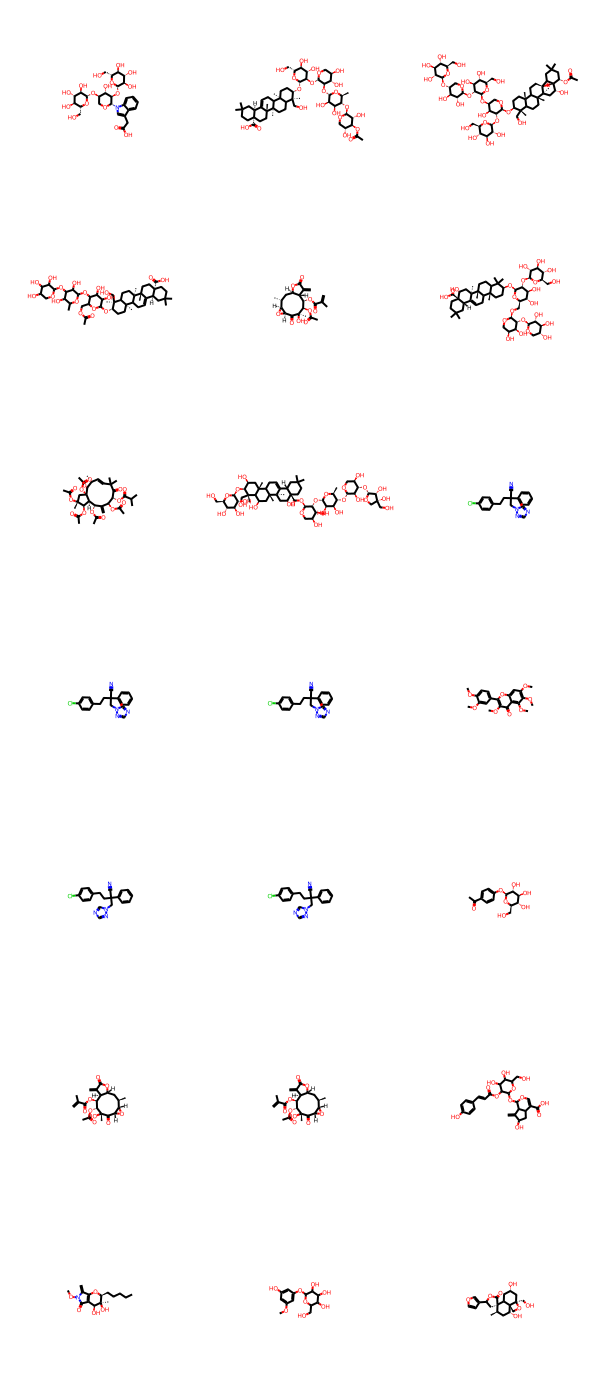

In [87]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in matched_smiles])

## include no statements. certain structures not in molecule. For example OH Groups related stuff; sugars and steroids in the upper case!!

### A motif would be than an massql query!!!

### if not completly clean possible: Add a false positive rate!!!